In [267]:
import bt
import pandas as pd
import matplotlib.pyplot as plt
import quantstats as qs
%matplotlib inline

In [174]:
data_fiis = pd.read_csv('../dividends_data/fiis_data_lookback_ytd.csv')
data_fiis.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,FII
0,2022-01-03 00:00:00-03:00,65.285918,71.249215,63.047324,65.370567,1775,0.0,0.0,ABCP11
1,2022-01-04 00:00:00-03:00,65.379990,65.728001,63.686936,65.379990,3142,0.0,0.0,ABCP11
2,2022-01-05 00:00:00-03:00,65.379984,69.603204,64.185439,64.740387,2919,0.0,0.0,ABCP11
3,2022-01-06 00:00:00-03:00,64.740380,68.117072,64.646323,66.583923,2119,0.0,0.0,ABCP11
4,2022-01-07 00:00:00-03:00,66.574516,69.132905,66.094816,68.662613,1767,0.0,0.0,ABCP11


In [175]:
unique_fiis = data_fiis['FII'].unique()
unique_fiis

array(['ABCP11', 'AIEC11', 'ARRI11', 'BARI11', 'BBFI11B', 'BBPO11',
       'BBRC11', 'BCIA11', 'BCRI11', 'BPFF11', 'BRCO11', 'CBOP11',
       'CJCT11', 'CTXT11', 'EURO11', 'FAMB11B', 'FIGS11', 'FIIB11',
       'FIIP11B', 'FVPQ11', 'GALG11', 'GTWR11', 'HABT11', 'HFOF11',
       'HGBS11', 'HGCR11', 'HGFF11', 'HGLG11', 'HGPO11', 'HGRE11',
       'HGRU11', 'HLOG11', 'HSAF11', 'HSLG11', 'HSML11', 'HTMX11',
       'ITIP11', 'ITIT11', 'JSRE11', 'KFOF11', 'KISU11', 'KNCR11',
       'KNHY11', 'KNIP11', 'KNRI11', 'KNSC11', 'LGCP11', 'LVBI11',
       'MALL11', 'MFII11', 'MXRF11', 'NSLU11', 'OUJP11', 'PATC11',
       'PATL11', 'PORD11', 'PQDP11', 'PRSV11', 'PVBI11', 'RBCO11',
       'RBED11', 'RBFF11', 'RBHG11', 'RBRD11', 'RBVA11', 'RBVO11',
       'RFOF11', 'RNGO11', 'RRCI11', 'RZTR11', 'SADI11', 'SARE11',
       'SDIL11', 'SHPH11', 'SPTW11', 'TEPP11', 'TGAR11', 'TRXF11',
       'URPR11', 'VIFI11', 'VILG11', 'VINO11', 'VISC11', 'VLOL11',
       'VRTA11', 'XPCI11', 'XPCM11', 'XPLG11', 'XPPR11', 'X

In [185]:
df2 = data_fiis.groupby('FII')['Date'].count()

In [201]:
# too little data
exclude_fiis = df2[df2<=30].index.values
exclude_fiis

array(['CJCT11', 'GALG11', 'HSAF11', 'HSLG11', 'HTMX11', 'ITIP11',
       'KISU11', 'NSLU11', 'PATL11', 'PVBI11', 'RBHG11', 'RRCI11',
       'RZTR11', 'TGAR11', 'URPR11'], dtype=object)

In [205]:
print(len(unique_fiis), len(exclude_fiis))
print(len(set(unique_fiis) ^ set(exclude_fiis)))
fiis_to_calculate = set(unique_fiis) ^ set(exclude_fiis)

90 15
75


In [212]:
data = bt.get(','.join([f'{i}.SA' for i in fiis_to_calculate]), start='2022-01-01')
#data = pd.read_csv('ytd_fiis.csv', parse_dates=['Date'])
print(data.head())

        Date   jsre11sa    hgru11sa   bbrc11sa   cbop11sa   sare11sa  \
0 2022-03-21  69.359100  103.875259  87.380173  55.728474  63.407257   
1 2022-03-22  69.197243  104.111229  87.463409  53.406452  63.854713   
2 2022-03-23  69.025879  103.761986  87.296951  53.527199  64.544525   
3 2022-03-24  68.521271  103.554321  87.981270  53.220695  63.817425   
4 2022-03-25  68.987785  105.781914  88.258698  53.963737  64.395386   

    figs11sa   kfof11sa   vrta11sa   brco11sa  ...   sdil11sa   mfii11sa  \
0  49.582443  67.958954  95.381020  92.284607  ...  80.932053  94.962044   
1  49.129128  69.396942  95.196350  92.218201  ...  80.351906  95.544006   
2  49.204674  68.444511  94.956284  91.601654  ...  81.427986  95.525536   
3  49.403004  68.724625  94.919350  91.440392  ...  81.568352  95.793419   
4  50.309666  70.946991  95.537979  91.829292  ...  83.280754  95.821136   

    kncr11sa  mxrf11sa   habt11sa    knri11sa   rbrd11sa   vilg11sa  \
0  92.154518  8.385446  95.600327  128.

In [252]:
# Exclude outliers
data = data[data.hfof11sa < 100]

In [253]:
#data.to_csv('ytd_fiis.csv')

In [254]:
data.Date

0     2022-03-21
1     2022-03-22
2     2022-03-23
3     2022-03-24
4     2022-03-25
         ...    
161   2022-11-09
162   2022-11-10
163   2022-11-11
164   2022-11-14
165   2022-11-16
Name: Date, Length: 165, dtype: datetime64[ns]

In [255]:
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [256]:
test = bt.Backtest(s, data.set_index('Date'))
res = bt.run(test)

<AxesSubplot: title={'center': 'Equity Progression'}>

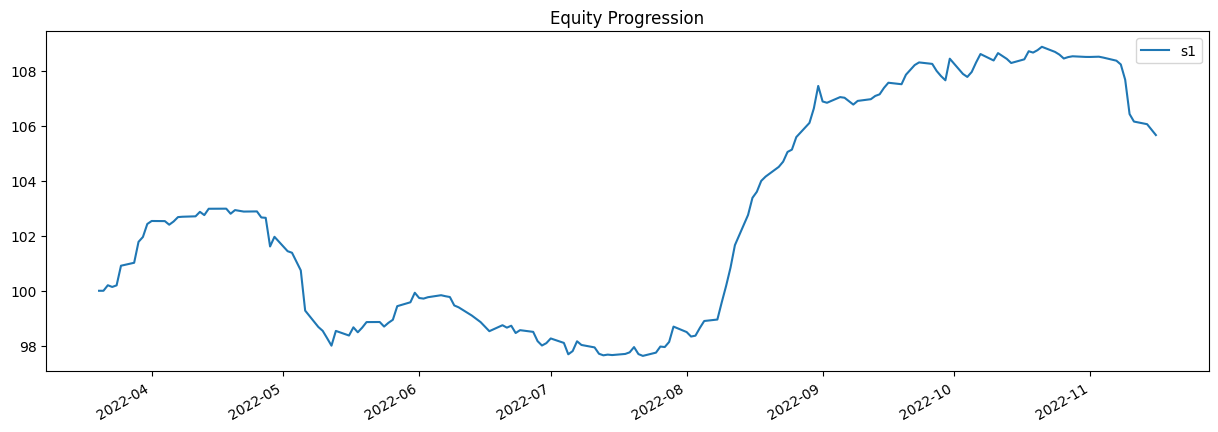

In [257]:
res.plot()

In [258]:
res.display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2022      0      0   2.43  -0.46  -1.99  -1.83   0.61   8.86   0.92   0.06  -2.62      0   5.66


In [259]:
res.display()

Stat                 s1
-------------------  ----------
Start                2022-03-20
End                  2022-11-16
Risk-free rate       0.00%

Total Return         5.66%
Daily Sharpe         1.64
Daily Sortino        2.70
CAGR                 8.70%
Max Drawdown         -5.20%
Calmar Ratio         1.67

MTD                  -2.62%
3m                   2.21%
6m                   7.41%
YTD                  5.66%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  8.70%

Daily Sharpe         1.64
Daily Sortino        2.70
Daily Mean (ann.)    8.55%
Daily Vol (ann.)     5.21%
Daily Skew           -0.50
Daily Kurt           3.69
Best Day             1.08%
Worst Day            -1.45%

Monthly Sharpe       0.42
Monthly Sortino      1.40
Monthly Mean (ann.)  5.34%
Monthly Vol (ann.)   12.60%
Monthly Skew         2.14
Monthly Kurt         5.24
Best Month           8.86%
Worst Month          -2.62%

Yearly Sharpe        -
Yearly So

In [304]:
## Common brazilian fixed income index as benchmark - 'IMAB11.SA'

In [309]:
#test = bt.Backtest(s, data.set_index('Date'))
# create our new strategy
data_fixed_income = bt.get('IMAB11.SA', start='2022-01-01')


In [313]:
s2 = bt.Strategy('s2', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data_fixed_income)
# we include test here to see the results side-by-side
#res2 = bt.run(test, test2)
res2 = bt.run(test2)

#res2.plot()

In [289]:
prices = res['s1'].__dict__['daily_prices']

<AxesSubplot: title={'center': 'Equity Progression'}>

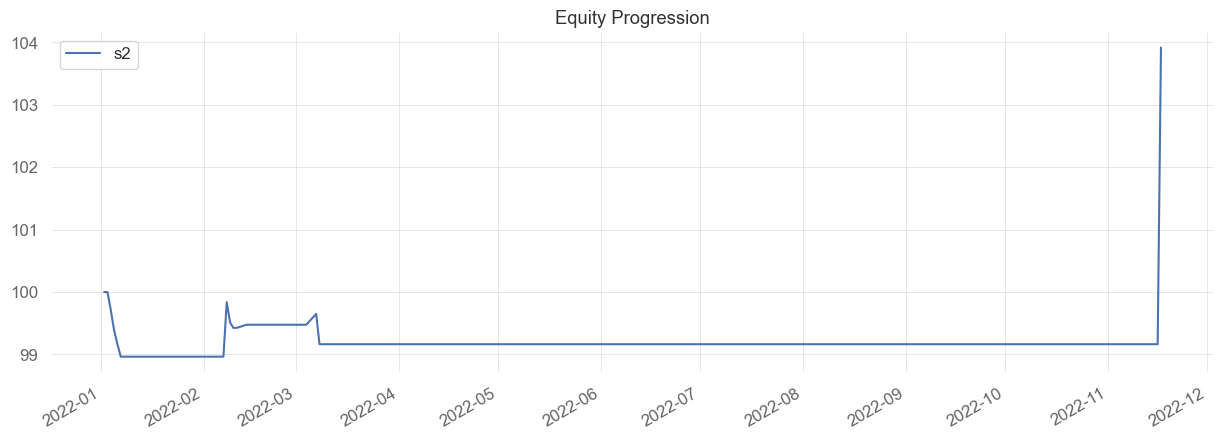

In [312]:
# Plotting
res2.plot()

In [291]:
returns = qs.utils.to_returns(prices)

In [295]:
#qs.reports.html(returns, title='GP FIIs', benchmark=fixed_income_returns)

C:\Users\gabri\miniconda3\envs\fiis\lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [329]:
qs.reports.basic(returns, benchmark='SPY')

TypeError: Cannot compare dtypes datetime64[ns, America/New_York] and datetime64[ns]

In [302]:
returns.index

DatetimeIndex(['2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23',
               '2022-03-24', '2022-03-25', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31',
               ...
               '2022-11-01', '2022-11-03', '2022-11-04', '2022-11-07',
               '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
               '2022-11-14', '2022-11-16'],
              dtype='datetime64[ns]', length=166, freq=None)

In [303]:
fixed_income_returns.index

DatetimeIndex(['2019-05-17 00:00:00-03:00', '2019-05-20 00:00:00-03:00',
               '2019-05-21 00:00:00-03:00', '2019-05-22 00:00:00-03:00',
               '2019-05-23 00:00:00-03:00', '2019-05-24 00:00:00-03:00',
               '2019-05-27 00:00:00-03:00', '2019-05-28 00:00:00-03:00',
               '2019-05-29 00:00:00-03:00', '2019-05-31 00:00:00-03:00',
               ...
               '2022-11-03 00:00:00-03:00', '2022-11-04 00:00:00-03:00',
               '2022-11-07 00:00:00-03:00', '2022-11-08 00:00:00-03:00',
               '2022-11-09 00:00:00-03:00', '2022-11-10 00:00:00-03:00',
               '2022-11-11 00:00:00-03:00', '2022-11-14 00:00:00-03:00',
               '2022-11-16 00:00:00-03:00', '2022-11-17 00:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='Date', length=864, freq=None)

In [359]:
data_xfix11 = bt.get('XFIX11.SA', start='2022-01-01')

In [360]:
s2 = bt.Strategy('s2', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

test2 = bt.Backtest(s2, data_xfix11)
# we include test here to see the results side-by-side
#res2 = bt.run(test, test2)
res2 = bt.run(test, test2)

<AxesSubplot: title={'center': 'Equity Progression'}>

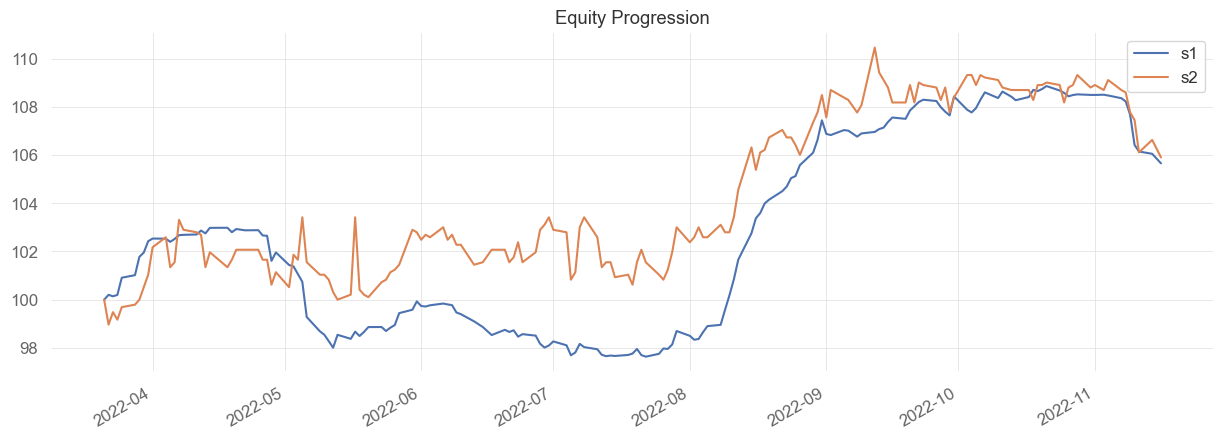

In [361]:
res2.plot()

In [362]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2022-03-21  2022-03-21
End                  2022-11-16  2022-11-16
Risk-free rate       0.00%       0.00%

Total Return         5.66%       5.91%
Daily Sharpe         1.64        0.81
Daily Sortino        2.71        1.44
CAGR                 8.74%       9.13%
Max Drawdown         -5.20%      -4.13%
Calmar Ratio         1.68        2.21

MTD                  -2.62%      -2.67%
3m                   2.21%       0.49%
6m                   7.41%       5.69%
YTD                  5.66%       5.91%
1Y                   -           -
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  8.74%       9.13%

Daily Sharpe         1.64        0.81
Daily Sortino        2.71        1.44
Daily Mean (ann.)    8.60%       9.50%
Daily Vol (ann.)     5.23%       11.68%
Daily Skew           -0.50       0.29
Daily Kurt           3.66    

In [358]:
#res2['s2'].__dict__['daily_prices']
res2['s2'].__dict__['daily_prices']

2022-03-21     97.573305
2022-03-22     96.562190
2022-03-23     97.067752
2022-03-24     96.764409
2022-03-25     97.269971
                 ...    
2022-11-09    105.156705
2022-11-10    104.853371
2022-11-11    103.538914
2022-11-14    104.044476
2022-11-16    103.336695
Name: s2, Length: 165, dtype: float64

In [363]:
returns_xfix11 = qs.utils.to_returns(data_ivvb)

C:\Users\gabri\miniconda3\envs\fiis\lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)



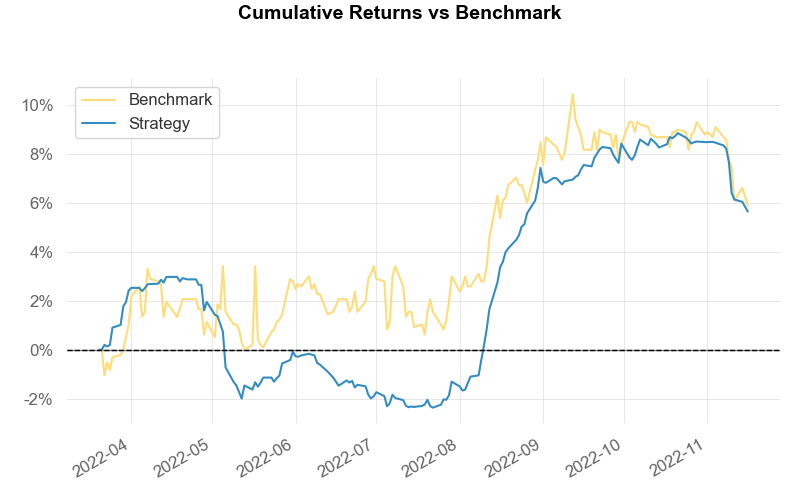
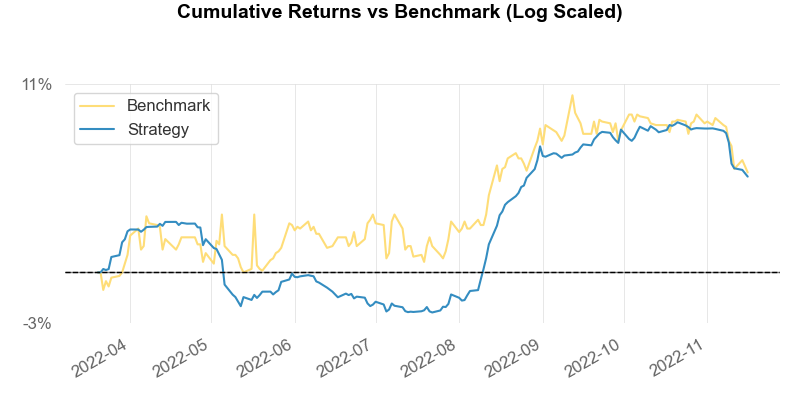
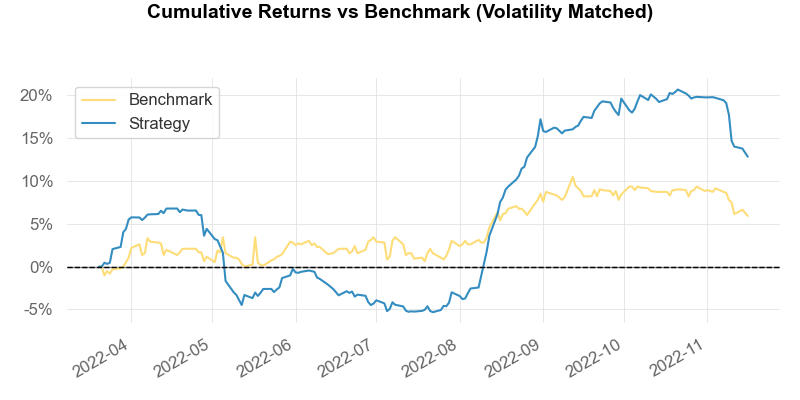
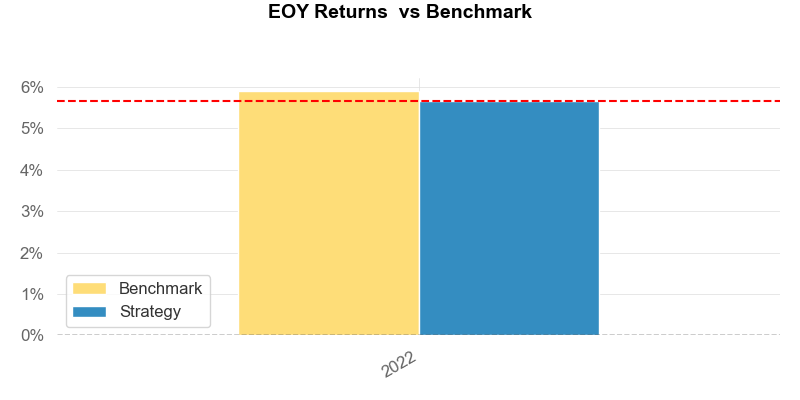
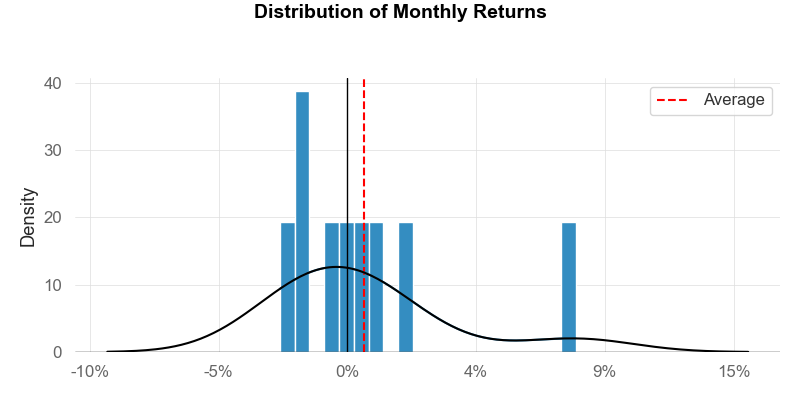
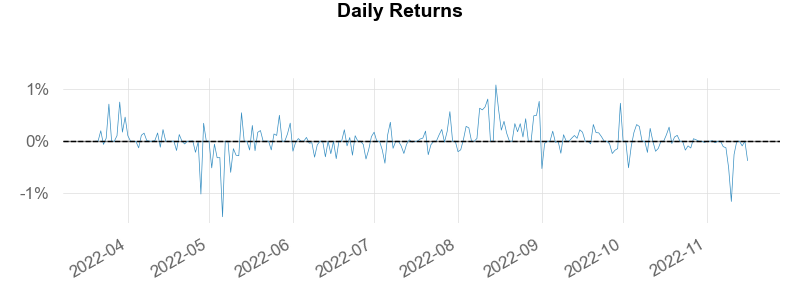
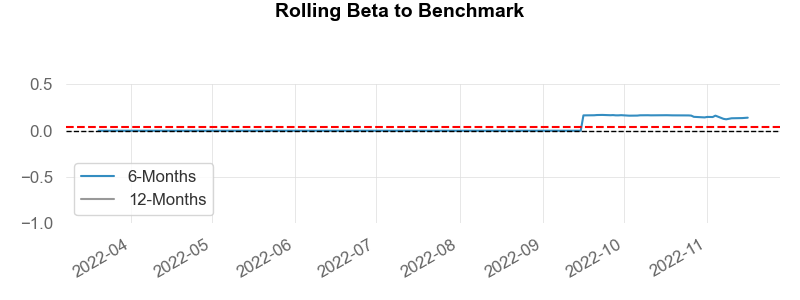
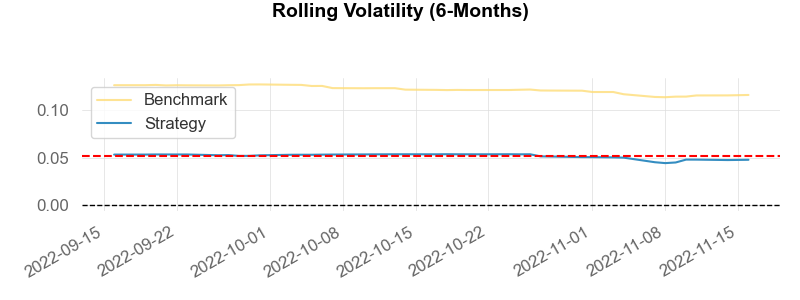
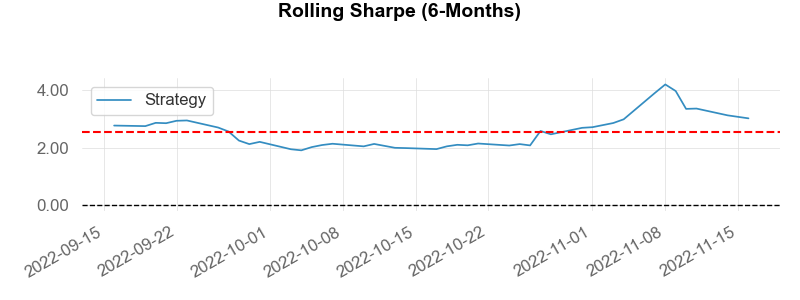
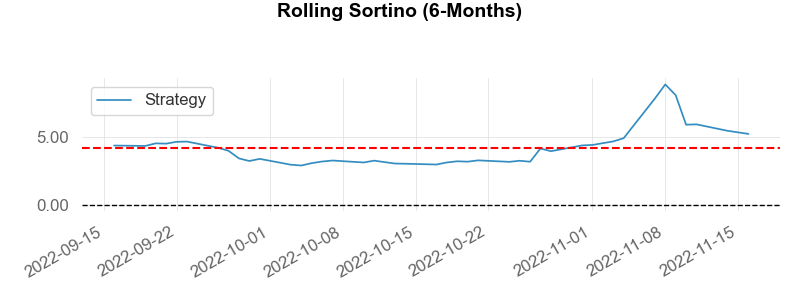
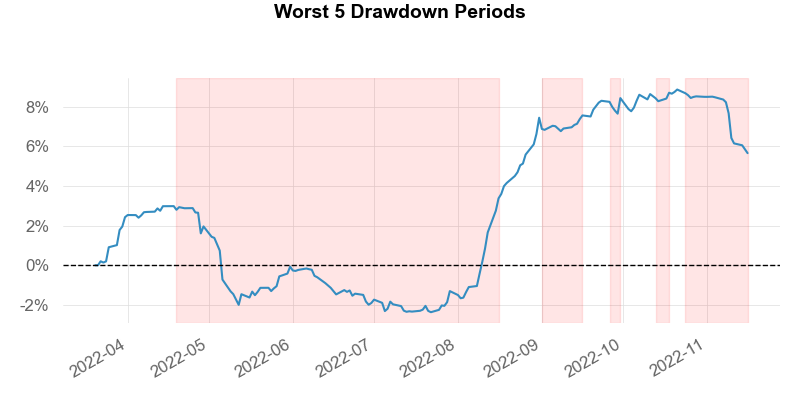
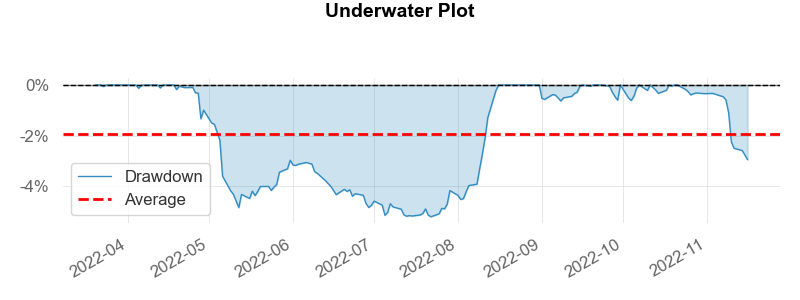
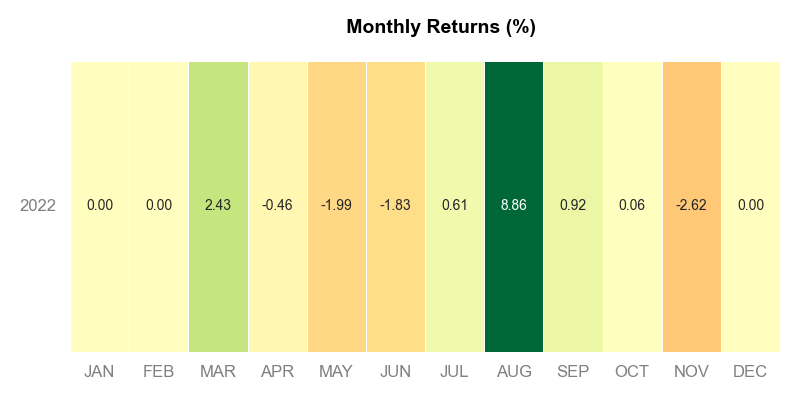
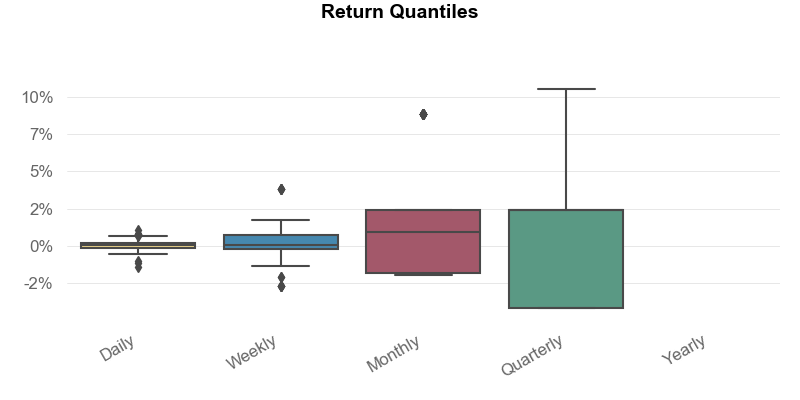

In [364]:
qs.reports.html(returns, benchmark=returns_xfix11, title='GP FIIs vs XFIX11',
    download_filename='tearsheet-fiis.html',
    figfmt='png')